# LIBS

In [72]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import thouless_times as thouless
import importlib
importlib.reload(thouless)
importlib.reload(hfun)
importlib.reload(cf)

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors

print(cf.base_directory)


../results/Heisenberg/disorder/PBC/


# MODEL INPUT AND OTHER INFO

In [73]:
base_info = hfun.info(cf.L, cf.J, cf.J0, cf.g, cf.g0, cf.h, cf.w, cf.k_sym, cf.p_sym, cf.x_sym)
print(base_info)
print(hfun.remove_info(base_info, 'g', 'w', 'L'))
hfun.print_vars(cf.params_arr, cf.names)


_L=16,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.70.dat
,J=1.00,J0=0.00,g0=0.00,h=0.00
L=16
J=1.00
g=0.55
h=0.00
w=0.70
k=0
p=1
x=1
J0=0.00
x0=0.00


# SPECTRAL FORM FACTOR

# THOULESS TIME

### PLOT DATA

[12 14 16 18]


Process SpawnPoolWorker-207:
Process SpawnPoolWorker-202:
Process SpawnPoolWorker-209:
Process SpawnPoolWorker-204:
Traceback (most recent call last):
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


KeyboardInterrupt: 

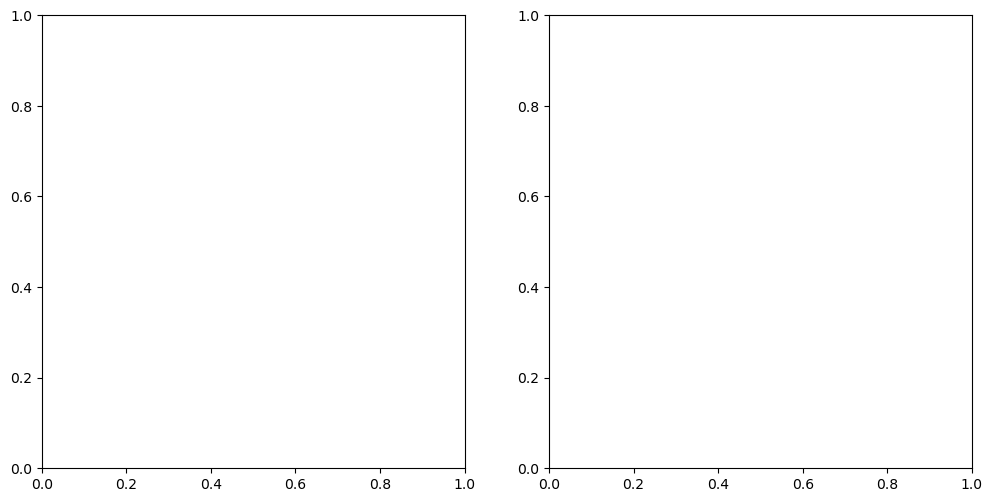

In [76]:
skip = 0
if skip == 0:
    #--- set initial plot settings
    fig, (axis1, axis2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi = 100)

    thouless.plot_with_gap_ratio(axis1=axis1, axis2=axis2, use_scaling_ansatz=1, scaling_ansatz='RG', crit_fun='free')

    x = np.array(range(-10000, 10000)) / 100.
    sclabel = cf.plot_settings.settings['vs']
    if cf.plot_settings.settings['vs_idx'] == 2:
        sclabel = hfun.var_name
    n = 2.0; axis1.plot(cf.plot_settings.rescale(x, 'x'), (5e-1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
    #n = 1.5; axis1.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='red', label=r"${%s}^{-%.2f}$"%(sclabel, n))
    #n = 2.5; axis1.plot(cf.plot_settings.rescale(x, 'x'), (5e4 / (x)**n), ls='--', color='blue', label=r"${%s}^{-%.2f}$"%(sclabel, n))
    #a=4.0;  axis1.plot(cf.plot_settings.rescale(x, 'x'), 6e5*np.exp(a * (x - cf.parameter_critical)**1 + a), ls='--', color='black', label=r"$exp(%.2f\cdot(%s-%s_c))$"%(a,sclabel,sclabel))
    #a=4.5;  axis1.plot(cf.plot_settings.rescale(x, 'x'), 1e2*np.exp(a / x**1 - a), ls='--', color='black', label=r"$exp(-%.2f \cdot %s)$"%(a,sclabel))
    #axis1.plot(cf.plot_settings.rescale(x, 'x'), 1.2e1*np.exp(0.6 / x**2 - 1), ls='--', color='black', label=r"$exp(-0.6 /\ {%s}^2)$"%sclabel)

    #axis1.set_xlim([cf.plot_settings.rescale(1e-8, 'x'), cf.plot_settings.rescale(1.5, 'x')])
    
    #axis1.set_xlim(1e-1, 3.5e0)
    axis1.legend()
    axis2.axvline(x=0.0, color='k', linestyle='--')
    #axis2.set_xlim(0, 1e2)
    #axis2.set_xscale('linear')

    def heisenberg_time(system_size, dim = None):
        if dim is None:
            dim = 2**system_size
        chi = 0.341345
        return (chi * dim) / ( system_size**(0.5)  * np.sqrt(cf.J * cf.J + cf.h * cf.h + cf.g * cf.g + (cf.w * cf.w + cf.g0 * cf.g0 + cf.J0 * cf.J0) / 3.) )
    #x = np.array(range(10, 19)).astype(np.float)
    #sclabel = new_settings.settings['vs']
    #n = 2;  axis3.plot(cf.plot_settings.rescale(x, 'x'), (8e0* (x/10.)**(n)), ls='--', color='red', label=r"${%s}^{%d}$"%(sclabel, n))
    #n = 5;  axis3.plot(cf.plot_settings.rescale(x, 'x'), (1e1* (x/10.)**(n)), ls='--', color='black', label=r"${%s}^{%d}$"%(sclabel, n))
    

    print(1.0 / 0.0)

## COST-FUN ANALYSIS

In [ ]:
#print(1./0.)

fig, ((axis1, axis2), (axis3, axis4), (axis5, axis6), (axis7, axis8)) = plt.subplots(nrows=4,ncols=2)
axes = ((axis1, axis2), (axis3, axis4), (axis5, axis6), (axis7, axis8))
fig.set_size_inches(18,36)

x = np.array(range(-10000, 10000)) / 100.
sclabel = cf.plot_settings.settings['vs']
if cf.plot_settings.settings['vs_idx'] == 2:
    sclabel = hfun.var_name

thouless.plot_with_gap_ratio(axis1=axis1, axis2=axis2, use_scaling_ansatz=1, scaling_ansatz='classic', crit_fun='free');  
n = 2.0; axis1.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis1.legend()
axis1.set_xlim(1e-2, 1.0e0);  axis2.set_xlim(-40, 30);

thouless.plot_with_gap_ratio(axis1=axis3, axis2=axis4, use_scaling_ansatz=1, scaling_ansatz='FGR', crit_fun='free')
n = 2.0; axis3.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis3.legend()
axis3.set_xlim(1e-1, 2e0);  axis4.set_xlim(-10, 30);

new_settings = cf.plot_settings
new_settings.set_scales(xscale = 'linear', yscale = 'log')
thouless.plplot_with_gap_ratioot(axis1=axis5, axis2=axis6, use_scaling_ansatz=1, scaling_ansatz='RG', crit_fun='free', new_settings=new_settings.settings)
n = 2.0; axis5.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis5.legend()
#axis5.set_xlim(1e-2, 2e0);  axis6.set_xlim(-5, 20);

thouless.plot_with_gap_ratio(axis1=axis7, axis2=axis8, use_scaling_ansatz=1, scaling_ansatz='KT', crit_fun='free', new_settings=new_settings.settings)
n = 2.0; axis7.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis7.legend()
#axis7.set_xlim(1e-1, 2e0);  axis8.set_xlim(-6, 15);



for ax in axes:
    ax[1].axvline(x=0.0, color='k', linestyle='--')


[10 12 14 16 18]
classic:  1.3046510026548812
-2229.4748755262626 3996.311682283792 0.7702731549799999 337709.203888 2 0
[10 12 14 16 18]
FGR:  3.3661545641645616
-58.462272239981054 359.56832047839913 0.7702731549799999 337709.203888 2 0
[10 12 14 16 18]


Process SpawnPoolWorker-318:
Process SpawnPoolWorker-320:
Process SpawnPoolWorker-315:
Process SpawnPoolWorker-316:
Process SpawnPoolWorker-313:
Process SpawnPoolWorker-311:
Process SpawnPoolWorker-314:
Process SpawnPoolWorker-317:
Traceback (most recent call last):
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/Users/rafal.swietek/opt/anaconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process SpawnPoolWorker-312:
Process SpawnPoolWo

In [ ]:
#xit.exit()
from costfun import costfun as cost
importlib.reload(cost)
np.set_printoptions(edgeitems=25, linewidth=100000)

user_settings = getattr(cf.plot_settings, 'settings')
vals, xvals, tau, gap_ratio = thouless.load()
num_of_plots = len(tau)

def get_cost(scaling_ansatz, crit_fun = 'free'):
    params = [0,0,0,0,0,0]
    x_max=None
    for x in xvals: 
        for _x_ in x: 
            if x_max is None or _x_ > x_max: x_max = _x_
    x_min = 0 if crit_fun == 'free' else -x_max
    bounds = [ (-10.0, 10.0), (x_min, x_max)]
    num_of_param = 0
    if crit_fun == 'free': 
        num_of_param = len(vals) - 1
    elif crit_fun == 'power_law' or crit_fun == 'inv': 
        num_of_param = 2;
    elif crit_fun == 'const':
        num_of_param = 0
    else: 
        num_of_param = 1
    for i in range(num_of_param): bounds.append((x_min, x_max))
    for r in range(1):
        params, cost_fun = cost.cost_func_minization(x=xvals, y=gap_ratio, sizes=vals, 
                                    scale_func=scaling_ansatz, 
                                    crit_func=crit_fun,
                                    bnds=bounds,
                                    population_size=1e2,
                                    maxiterarions=1e3, workers=10, realisations=1
                                )
        #print(r, cost_fun, params)
    print(scaling_ansatz, crit_fun, cost_fun, params)
    return params

ansatz_list = ['classic', 'FGR', 'RG', 'KT']
params_free = []
params_inv = []
for ansatz in ansatz_list:
    params_free.append(get_cost(scaling_ansatz=ansatz, crit_fun='free'))
    params_inv.append(get_cost(scaling_ansatz=ansatz, crit_fun='inv'))
    


classic free 0.25318955042527524 [1.63530223 0.34791903 0.31834937 0.29219486 0.2661575 ]
classic inv 0.2612117530100506 [1.64878371 0.00493675 0.54883459 0.15544538]
FGR free 0.26326908207224164 [3.12210325 0.80615978 0.68596856 0.58751292 0.50214153]
FGR inv 0.2597757649397969 [ 3.18853885  0.23628702  0.88881705 -0.37946564]
RG free 0.2518226002430126 [0.60684736 0.66948916 0.56673119 0.49155719 0.43064201]
RG inv 0.25878161935270017 [ 0.60971739 -0.00488043 -0.07219873  0.13717944]
KT free 0.24378659008063663 [0.84312472 0.00933671 0.04061146 0.05665442 0.06330611]
KT inv 0.24942008174086006 [ 2.25264001 -0.17775567  0.4039322  -0.09445913]


[0.34791903 0.31834937 0.29219486 0.2661575 ]
[0.00493675 0.54883459 0.15544538]
[0.80615978 0.68596856 0.58751292 0.50214153]
[ 0.23628702  0.88881705 -0.37946564]
[0.66948916 0.56673119 0.49155719 0.43064201]
[-0.00488043 -0.07219873  0.13717944]
[0.00933671 0.04061146 0.05665442 0.06330611]
[-0.17775567  0.4039322  -0.09445913]


(0.0, 2.0)

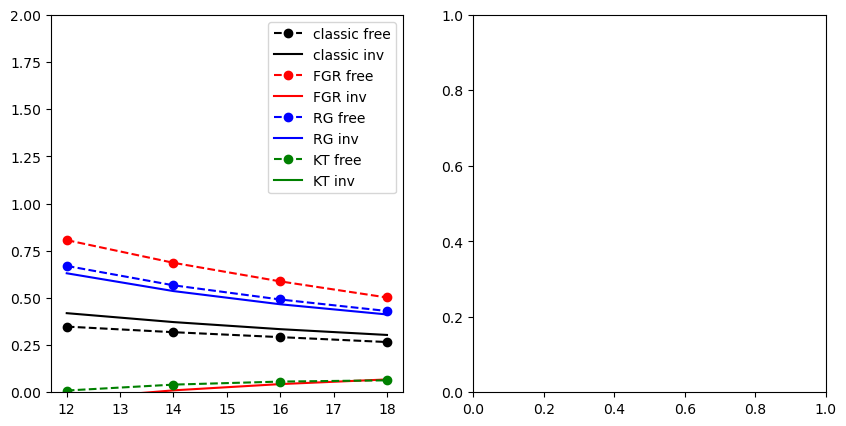

In [ ]:
fig, (ax1, ax2)= plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 100)

def plot_params(params, color='black', lab=''):
    crit_pars = np.array(params[1:])
    print(crit_pars)
    #for i in range(len(vals)):
    ax1.plot(vals, crit_pars, color=color, label=lab, linestyle='--', marker='o')
colors = ['black', 'red', 'blue', 'green']
def crit(x, crit_pars):
    #return crit_pars[0] + crit_pars[1] * x
    return crit_pars[0] + 1.0 / ( crit_pars[1] + crit_pars[2] * x)
for i in range(0,len(ansatz_list)):
    plot_params(params_free[i], colors[i], ansatz_list[i] + ' free')
    crit_pars = np.array(params_inv[i][1:])
    print(crit_pars)
    ax1.plot(vals, crit(vals, crit_pars), color=colors[i], label=ansatz_list[i] + ' inv')
ax1.legend()
#ax.plot(vals, crit_pars)
ax1.set_ylim(0,2)